In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [3]:
# Datos de entrada para el problema XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)

# Datos de salida para el problema XOR
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [4]:
# Crear el modelo
model = Sequential([
    Input(shape=(2,)),
    Dense(units=2, activation='sigmoid'),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss='mean_squared_error',
              metrics=['mse', 'binary_accuracy'])
model.summary()

E0000 00:00:1743981263.448150    7592 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1743981263.448785    7592 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Entrenar el modelo
history = model.fit(X, y, epochs=500, verbose=0)

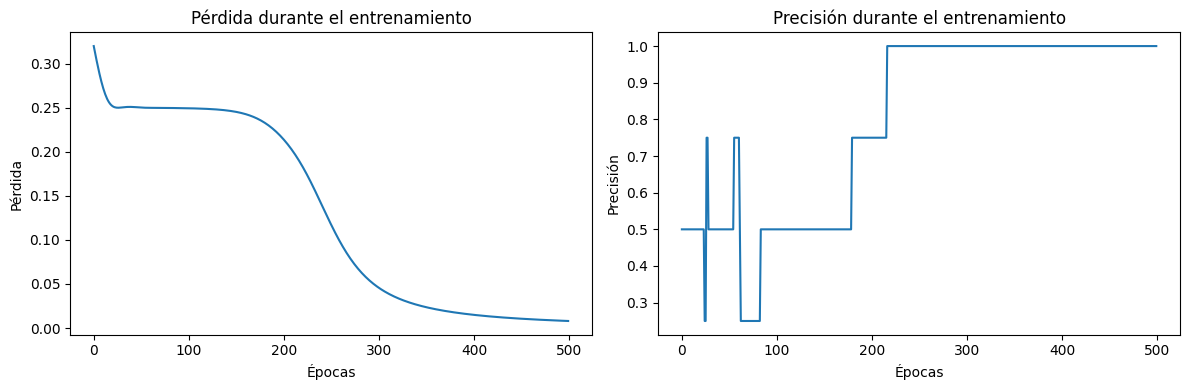

In [6]:
# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'])
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')

plt.tight_layout()
plt.show()

In [7]:
# Realizar predicciones
predictions = model.predict(X)
print("\nPredicciones:")
for i, pred in enumerate(predictions):
    value = 0 if pred[0] <= 0.5 else 1
    print(f"Entrada: {X[i]} -> Predicción: {pred[0]:.4f} -> {value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Predicciones:
Entrada: [0. 0.] -> Predicción: 0.0978 -> 0
Entrada: [0. 1.] -> Predicción: 0.9142 -> 1
Entrada: [1. 0.] -> Predicción: 0.9185 -> 1
Entrada: [1. 1.] -> Predicción: 0.0917 -> 0
